In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics

In [5]:
print("library version check")
print("numpy: ", np.__version__)
print("pandas: ", pd.__version__)
print("seaborn: ", sns.__version__)
print("matplotlib: ", mpl.__version__)
print("sklearn: ", sklearn.__version__)

library version check
numpy:  1.23.5
pandas:  1.5.1
seaborn:  0.12.1
matplotlib:  3.6.2
sklearn:  1.1.3


In [6]:
matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
mpl.style.use("default")
mpl.rcParams.update({"figure.constrained_layout.use": True})

sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

In [7]:
iris = pd.read_csv("../data/Iris.csv") 

In [8]:
iris.head(2) 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [9]:
iris.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Removing the unneeded column

In [10]:
iris.drop('Id',axis=1, inplace=True) 

### Splitting The Data into Training And Testing Dataset

In [11]:
train, test = train_test_split(iris, test_size = 0.3, random_state = 97)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [12]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species  

# ML

* SVM
* Logistic Regression
* Decision Tree
* k-NN

### Support Vector Machine (SVM)

In [13]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 0.9777777777777777


### Logistic Regression

In [14]:
model = LogisticRegression(max_iter=200)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9555555555555556


### Decision Tree

In [15]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9111111111111111


### K-Nearest Neighbours

In [16]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9333333333333333


### We used all the features of iris in above models. Now we will use Petals and Sepals Seperately

### Creating Petals And Sepals Training Data 

In [17]:
petal=iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal=iris[['SepalLengthCm','SepalWidthCm','Species']]

In [18]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p=test_p.Species


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species

### SVM

In [15]:
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


### Logistic Regression

In [16]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


### Decision Tree

In [17]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6444444444444445


### K-Nearest Neighbours

In [18]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


# 두 개 특성만으로 분류하여 시각화 해보자.

In [19]:
width_col = ["SepalWidthCm", "PetalWidthCm"]

# k-NN

In [23]:
model_w_knn = KNeighborsClassifier(n_neighbors=3)  
model_w_knn.fit(train_X[width_col], train_y)
prediction_w_knn = model_w_knn.predict(test_X[width_col])

test["knn pred"] = prediction_w_knn

print('The accuracy of the KNN using Width is', 
      metrics.accuracy_score(prediction_w_knn, test_y))

The accuracy of the KNN using Width is 0.9111111111111111


# Decision Tree

In [24]:
model_w_tree = DecisionTreeClassifier()
model_w_tree.fit(train_X[width_col], train_y)
prediction_w_tree = model_w_tree.predict(test_X[width_col])

test["tree pred"] = prediction_w_tree

print('The accuracy of the DT using Width is', 
      metrics.accuracy_score(prediction_w_tree, test_y))

The accuracy of the DT using Width is 0.9111111111111111


In [25]:
test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,knn pred,tree pred
48,5.3,3.7,1.5,0.2,Iris-setosa,Iris-setosa,Iris-setosa
21,5.1,3.7,1.5,0.4,Iris-setosa,Iris-setosa,Iris-setosa
63,6.1,2.9,4.7,1.4,Iris-versicolor,Iris-versicolor,Iris-versicolor
88,5.6,3.0,4.1,1.3,Iris-versicolor,Iris-versicolor,Iris-versicolor
146,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica,Iris-virginica
91,6.1,3.0,4.6,1.4,Iris-versicolor,Iris-versicolor,Iris-versicolor
22,4.6,3.6,1.0,0.2,Iris-setosa,Iris-setosa,Iris-setosa
59,5.2,2.7,3.9,1.4,Iris-versicolor,Iris-virginica,Iris-versicolor
6,4.6,3.4,1.4,0.3,Iris-setosa,Iris-setosa,Iris-setosa
117,7.7,3.8,6.7,2.2,Iris-virginica,Iris-virginica,Iris-virginica


In [26]:
color = {test["Species"].unique()[0]: 'tab:orange', 
         test["Species"].unique()[1]: 'tab:blue',
         test["Species"].unique()[2]: 'tab:green'}

color_s = test["Species"].replace(color)
color_knn = test["knn pred"].replace(color)
color_tree = test["tree pred"].replace(color)

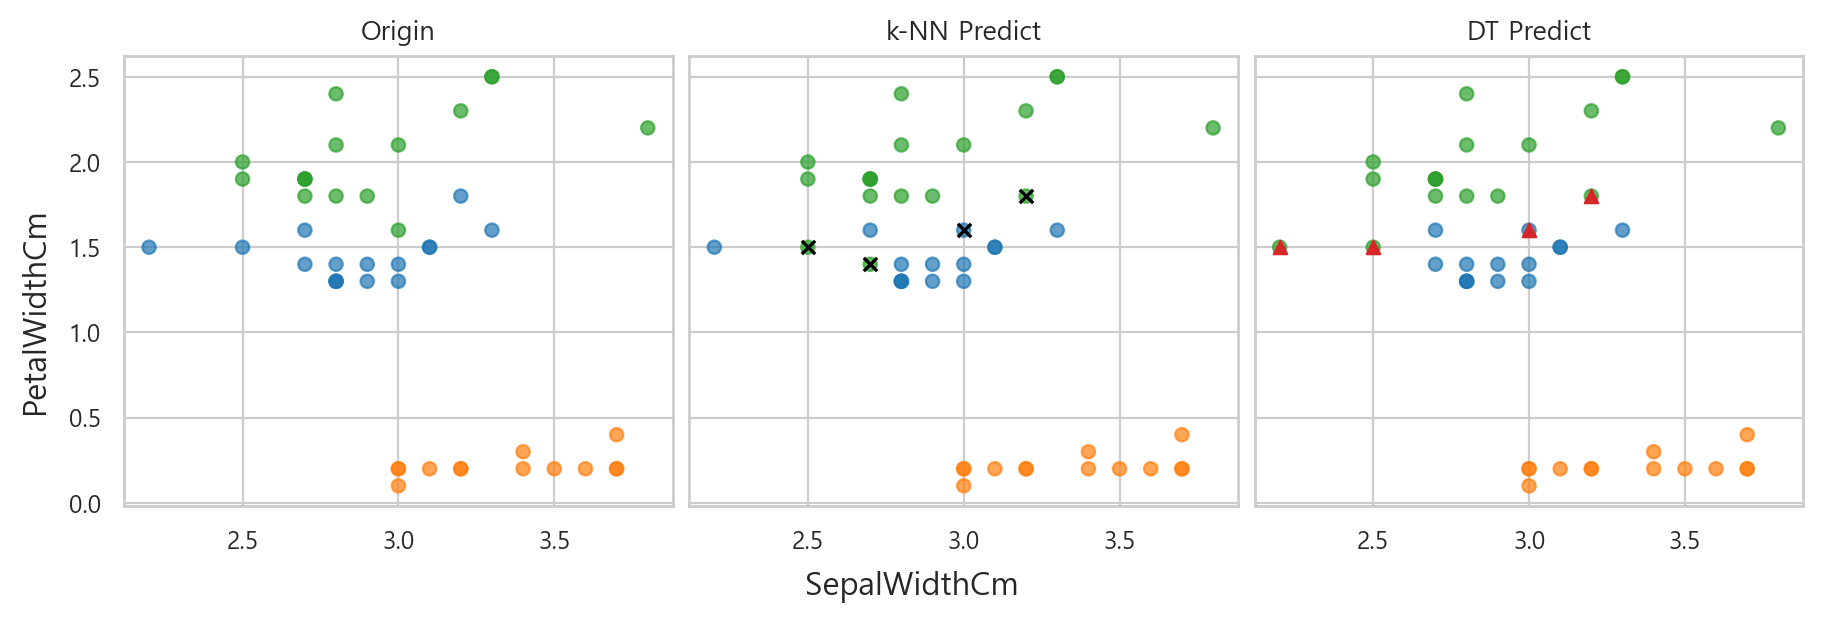

In [29]:
feature_x = width_col[0]
feature_y = width_col[1]

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex = True, sharey= True)

for n, c, ax in zip(["Origin", "k-NN Predict", "DT Predict"], 
                    [color_s, color_knn, color_tree], 
                    axes.flat):
    
    ax.scatter(x = test[feature_x],
               y = test[feature_y],
               color=c,
               alpha=0.7)
    ax.set_title(f"{n}")
    
fig.supxlabel(f"{feature_x}")
fig.supylabel(f"{feature_y}")

        
# 틀린 부분 표시    
axes[1].scatter(test[test["Species"] != test["knn pred"]][feature_x],
                test[test["Species"] != test["knn pred"]][feature_y],
                color = "black",
                marker = "x")

axes[2].scatter(test[test["Species"] != test["tree pred"]][feature_x],
                test[test["Species"] != test["tree pred"]][feature_y],
                color = "tab:red",
                marker = "^")

plt.tight_layout();